数组为有序数组，同时题目还强调数组中无重复元素，因为一旦有重复元素，使用二分查找法返回的元素下标可能不是唯一的，这些都是使用二分法的前提条件，

给你一个按照非递减顺序排列的整数数组 nums，和一个目标值 target。请你找出给定目标值在数组中的开始位置和结束位置。

如果数组中不存在目标值 target，返回 [-1, -1]。

你必须设计并实现时间复杂度为 O(log n) 的算法解决此问题。

In [ ]:
class Solution:
    def search_edge(self, nums: List[int], target: int, edge: str) -> List[int]:
        h = 0
        t = len(nums)
        p = -1
        while h < t:
            m = h + (t-h)//2
            if nums[m] > target:
                t = m
            elif nums[m] < target:
                h = m+1
            else:
                p = m
                if edge=='left':
                    t = m
                else:
                    h = m+1
        return p
    
    def searchRange(self, nums: List[int], target: int) -> List[int]:
       return [self.search_edge(nums, target, 'left'), self.search_edge(nums, target, 'right')]

In [ ]:
class Solution(object):
    def searchRange(self,nums, target):
        def left_func(nums,target):
            n = len(nums)-1
            left = 0
            right = n
            while(left<=right):
                mid = (left+right)//2
                if nums[mid] >= target:
                    right = mid-1
                if nums[mid] < target:
                    left = mid+1
            return left
        a =  left_func(nums,target)
        b = left_func(nums,target+1)
        if  a == len(nums) or nums[a] != target:
            return [-1,-1]
        else:
            return [a,b-1]

给你一个非负整数 x ，计算并返回 x 的 算术平方根 。

由于返回类型是整数，结果只保留 整数部分 ，小数部分将被 舍去 。

注意：不允许使用任何内置指数函数和算符，例如 pow(x, 0.5) 或者 x ** 0.5 。

来源：力扣（LeetCode）
链接：https://leetcode.cn/problems/sqrtx
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
class Solution:
    def mySqrt(self, x: int) -> int:
        h = 0
        t = x+1
        p = 0
        while h < t:
            m = h + (t-h)//2
            s = m * m
            if s > x:
                t = m
            elif s < x:
                p = m
                h = m + 1
            else:
                return m
        return p


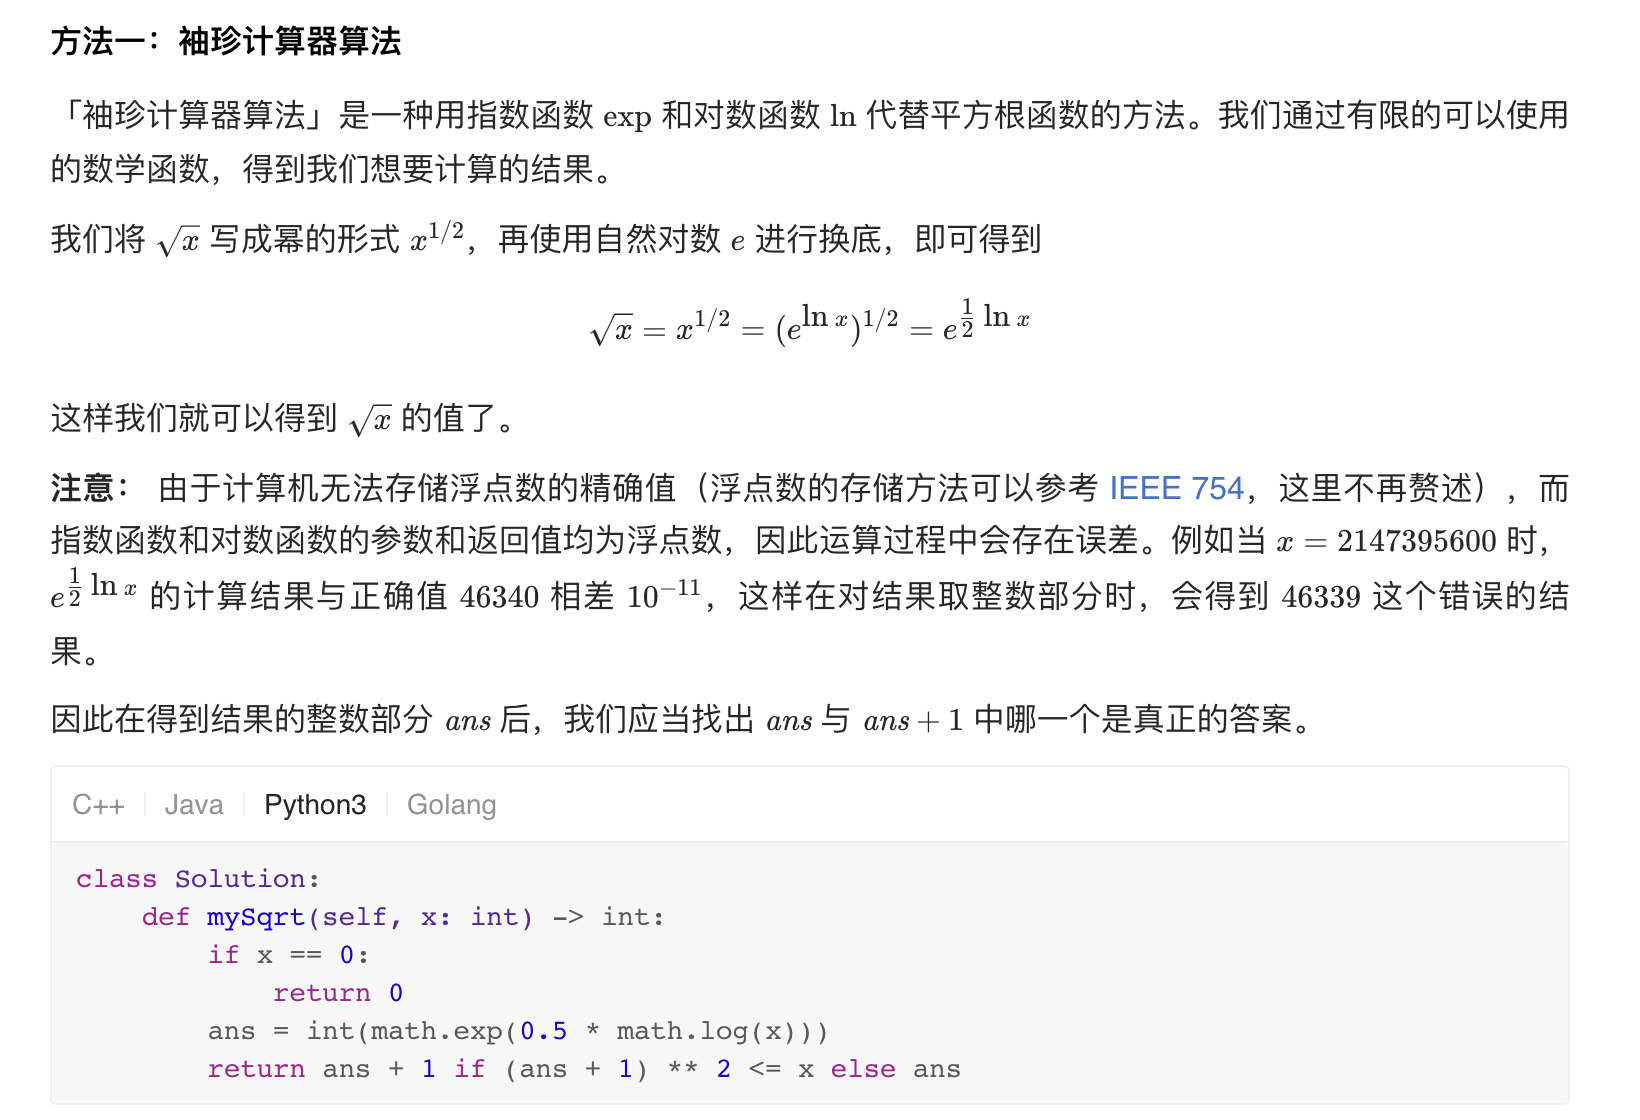

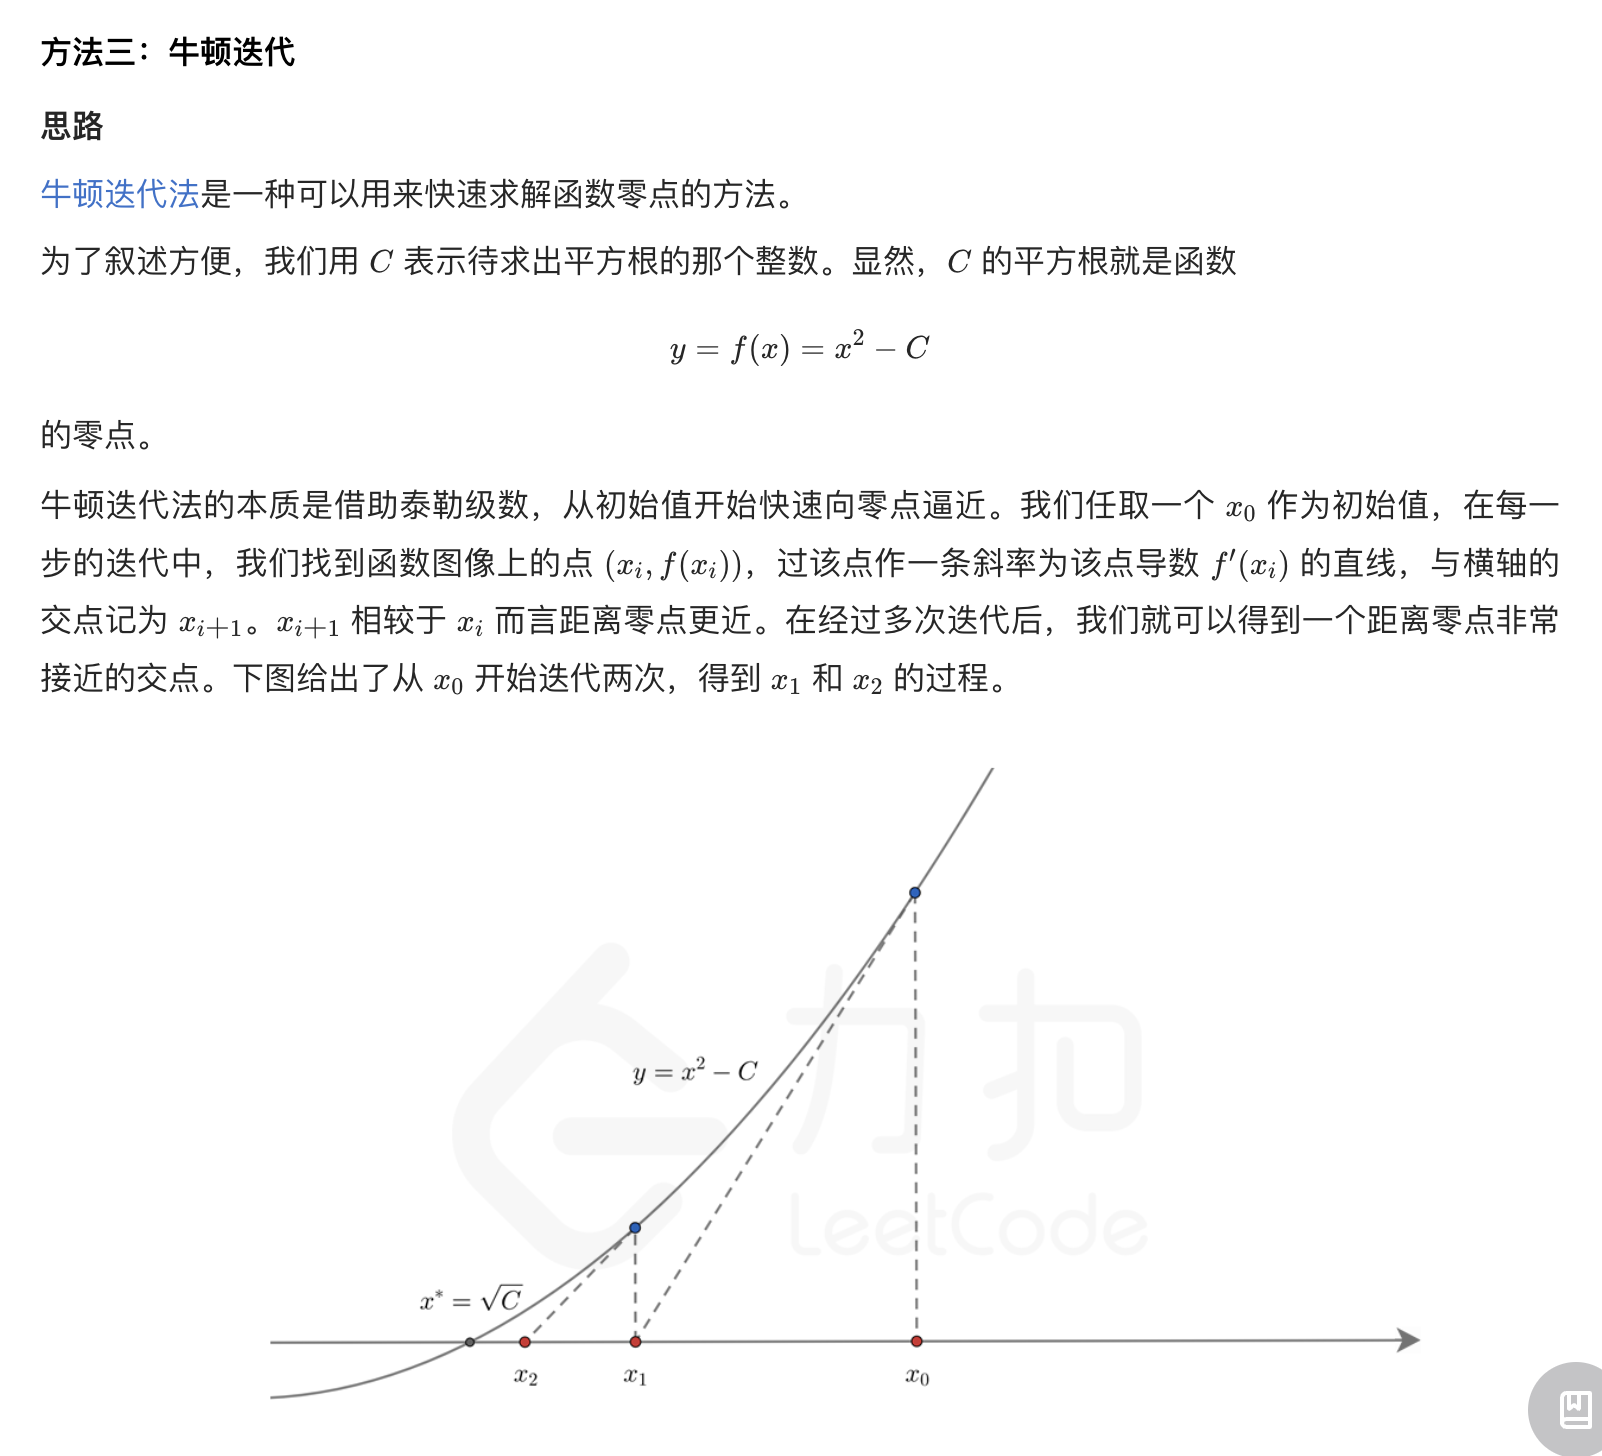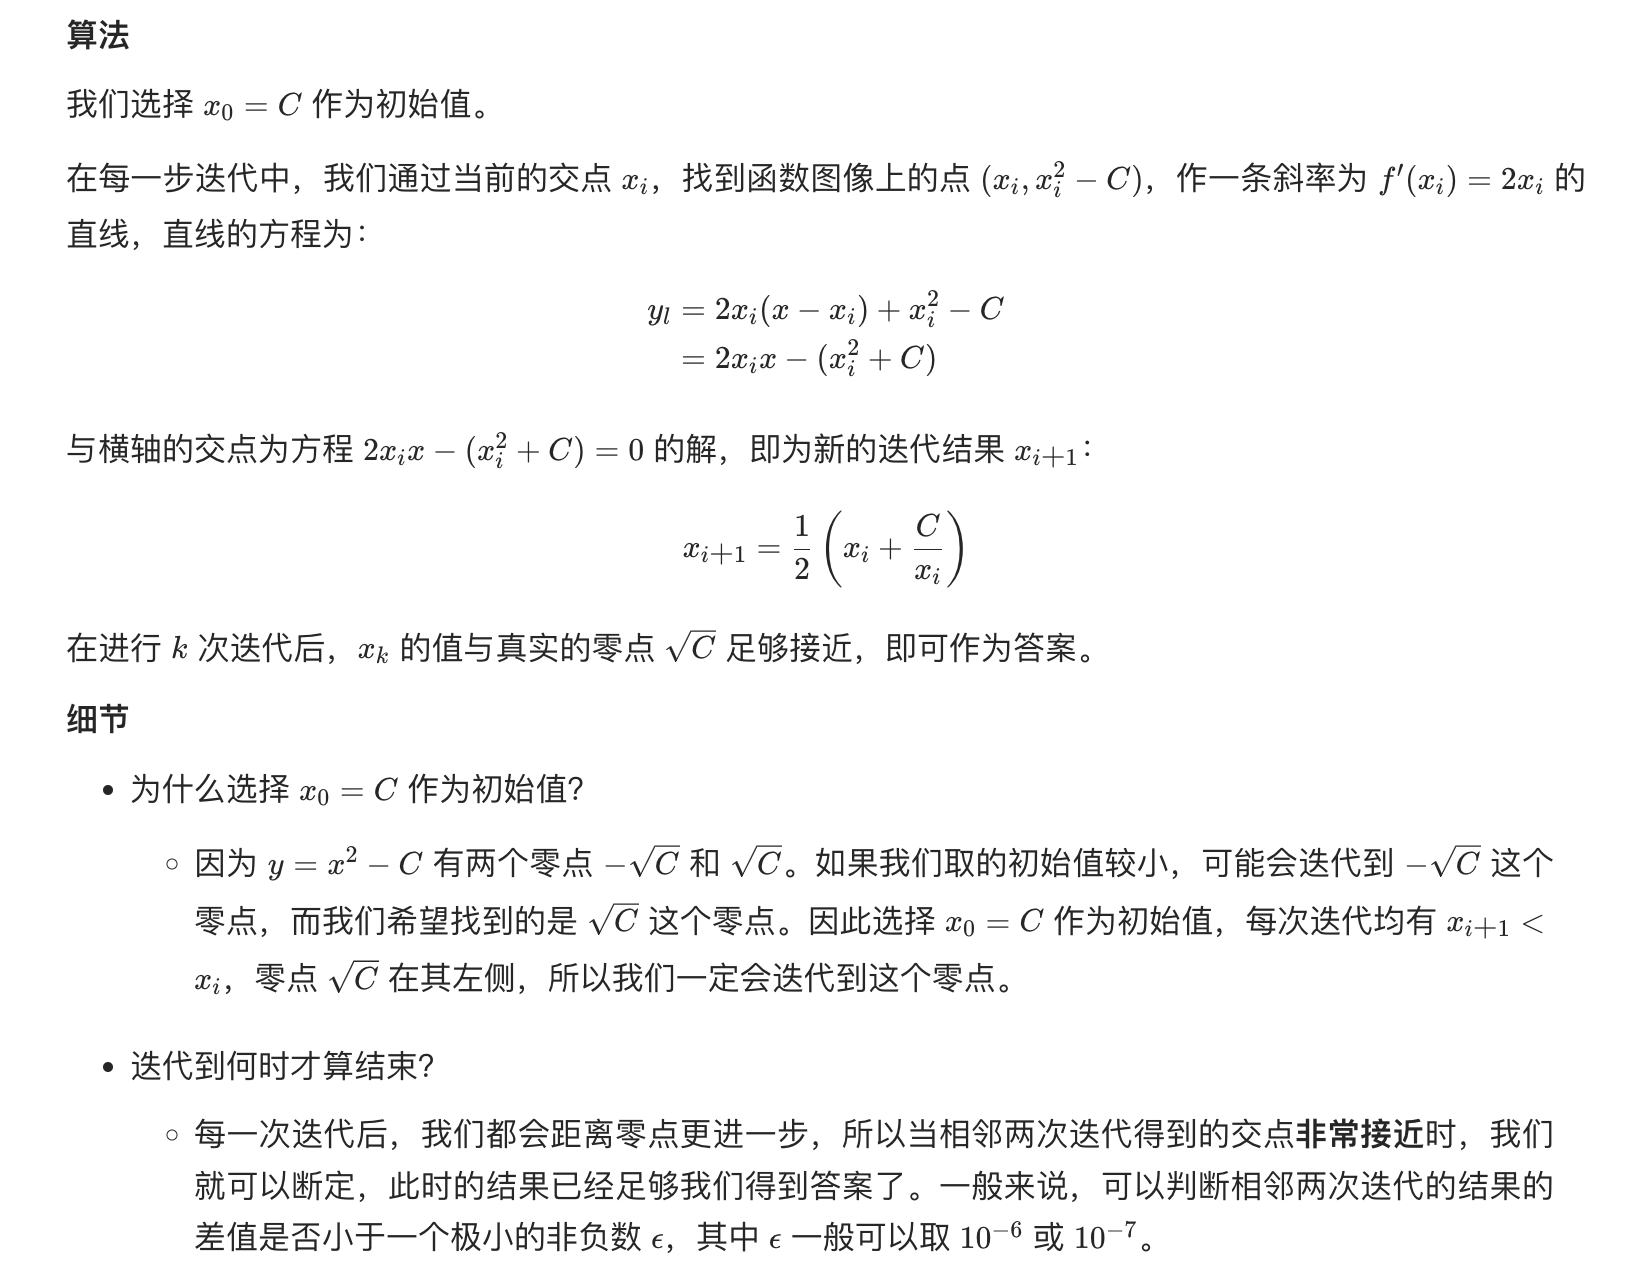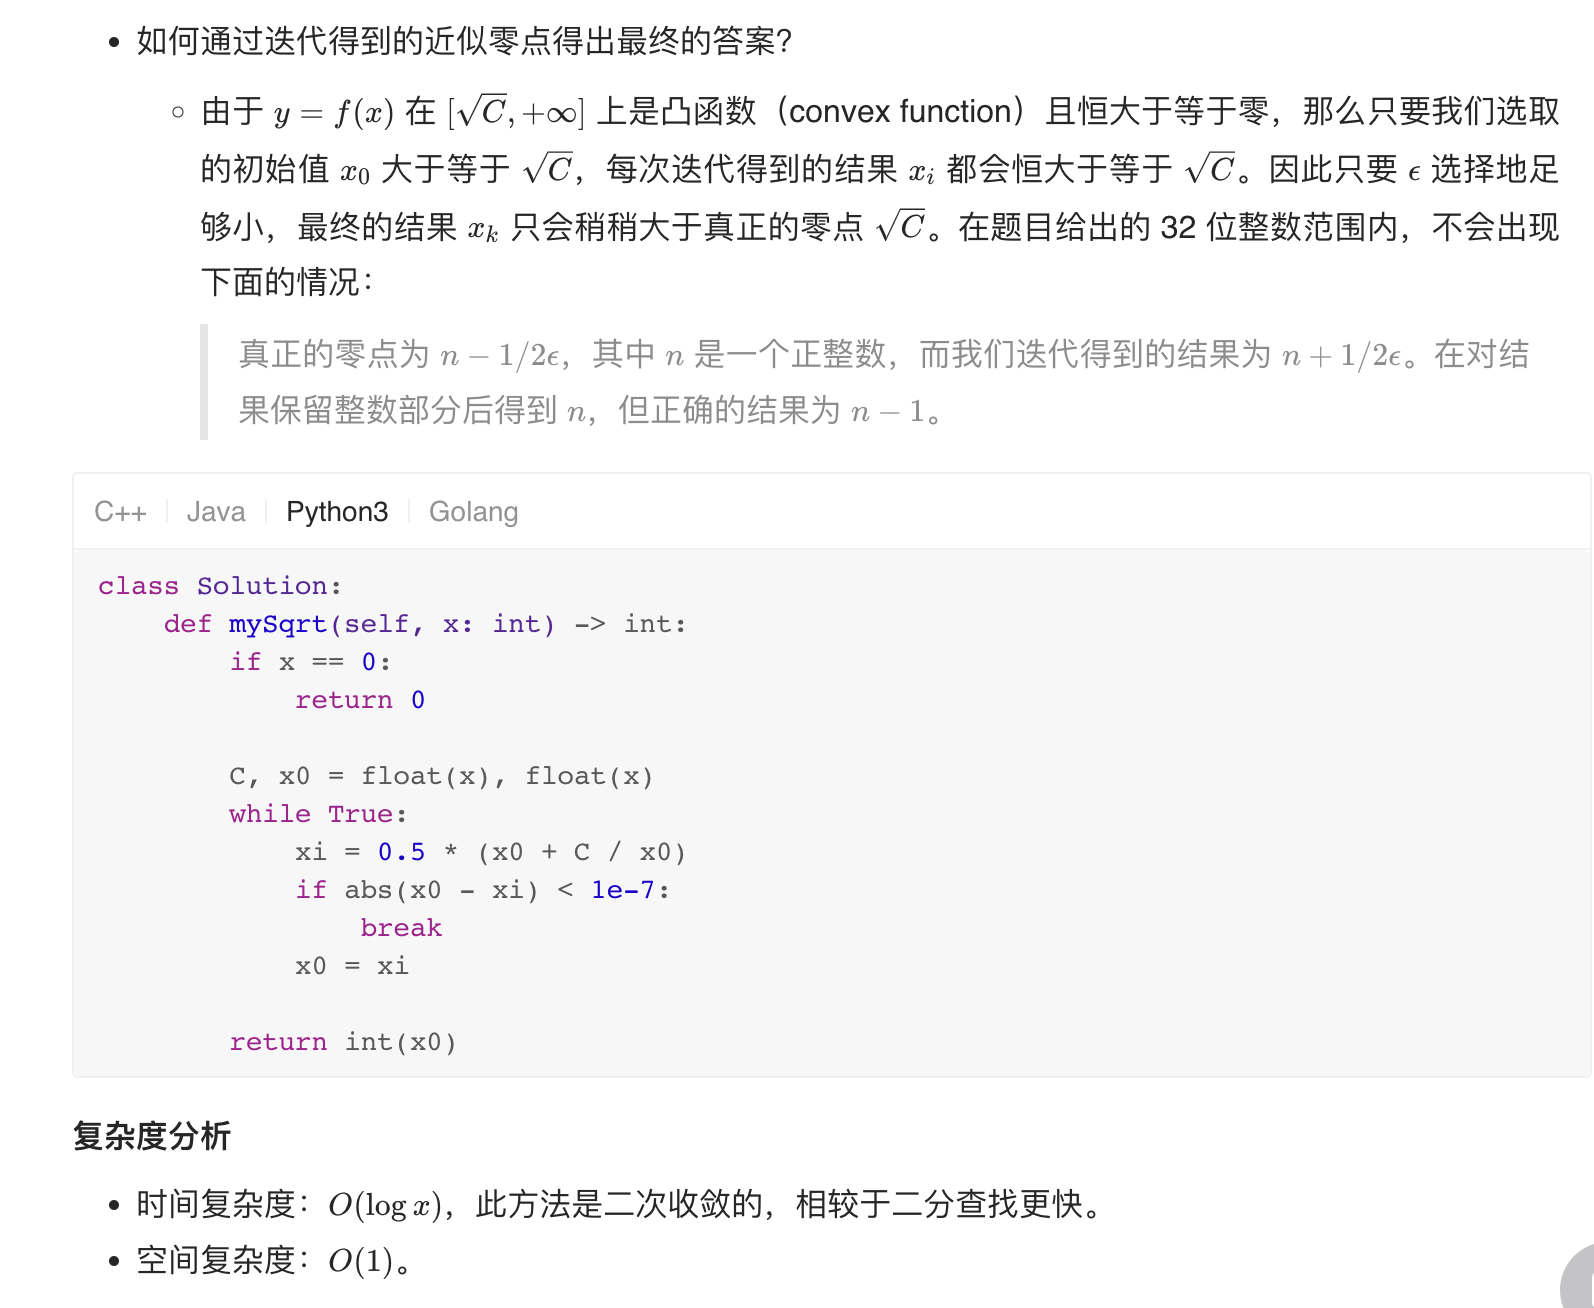

367. 有效的完全平方数

给定一个 正整数 num ，编写一个函数，如果 num 是一个完全平方数，则返回 true ，否则返回 false 。

进阶：不要 使用任何内置的库函数，如  sqrt 。

来源：力扣（LeetCode）
链接：https://leetcode.cn/problems/valid-perfect-square
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
class Solution:
    def isPerfectSquare(self, num: int) -> bool:
        h, t = 0, num+1
        while h < t:
            m = h + (t-h)//2
            s = m * m
            if s > num:
                t = m
            elif s < num:
                h = m+1
            else:
                return True
        return False

牛顿迭代法要消除，(x*x)/(2*x)这样没消除x可能会数值溢出

点斜式：y-y_0 = k(x-x_0)

数值中移动元素常考虑：双指针法

26. 删除有序数组中的重复项

给你一个 升序排列 的数组 nums ，请你 原地 删除重复出现的元素，使每个元素 只出现一次 ，返回删除后数组的新长度。元素的 相对顺序 应该保持 一致 。

In [ ]:
class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        h = 0
        t = 1
        while t < len(nums):
            if nums[t] == nums[h]:
                t += 1
            else:
                h += 1
                nums[h] = nums[t]
                t += 1
        return h+1

给定一个数组 nums，编写一个函数将所有 0 移动到数组的末尾，同时保持非零元素的相对顺序。

In [ ]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        n = len(nums)
        left = right = 0
        while right < n:
            if nums[right] != 0:
                nums[left], nums[right] = nums[right], nums[left]
                left += 1
            right += 1


给定 s 和 t 两个字符串，当它们分别被输入到空白的文本编辑器后，如果两者相等，返回 true 。# 代表退格字符。

注意：如果对空文本输入退格字符，文本继续为空。

方法一：重构字符串
class Solution:
    def backspaceCompare(self, S: str, T: str) -> bool:
        def build(s: str) -> str:
            ret = list()
            for ch in s:
                if ch != "#":
                    ret.append(ch)
                elif ret:
                    ret.pop()
            return "".join(ret)
        
        return build(S) == build(T)

方法二：双指针
一个字符是否会被删掉，只取决于该字符后面的退格符，而与该字符前面的退格符无关。因此当我们逆序地遍历字符串，就可以立即确定当前字符是否会被删掉。

class Solution:
    def backspaceCompare(self, S: str, T: str) -> bool:
        i, j = len(S) - 1, len(T) - 1
        skipS = skipT = 0

        while i >= 0 or j >= 0:
            while i >= 0:
                if S[i] == "#":
                    skipS += 1
                    i -= 1
                elif skipS > 0:
                    skipS -= 1
                    i -= 1
                else:
                    break
            while j >= 0:
                if T[j] == "#":
                    skipT += 1
                    j -= 1
                elif skipT > 0:
                    skipT -= 1
                    j -= 1
                else:
                    break
            if i >= 0 and j >= 0:
                if S[i] != T[j]:
                    return False
            elif i >= 0 or j >= 0:
                return False
            i -= 1
            j -= 1
        
        return True

977. 有序数组的平方
给你一个按 非递减顺序 排序的整数数组 nums，返回 每个数字的平方 组成的新数组，要求也按 非递减顺序 排序。

 

示例 1：

输入：nums = [-4,-1,0,3,10]
输出：[0,1,9,16,100]
解释：平方后，数组变为 [16,1,0,9,100]
排序后，数组变为 [0,1,9,16,100]

In [ ]:
class Solution:
    def sortedSquares(self, nums: List[int]) -> List[int]:
        n = len(nums)
        negative = -1
        for i, num in enumerate(nums):
            if num < 0:
                negative = i
            else:
                break

        ans = list()
        i, j = negative, negative + 1
        while i >= 0 or j < n:
            if i < 0:
                ans.append(nums[j] * nums[j])
                j += 1
            elif j == n:
                ans.append(nums[i] * nums[i])
                i -= 1
            elif nums[i] * nums[i] < nums[j] * nums[j]:
                ans.append(nums[i] * nums[i])
                i -= 1
            else:
                ans.append(nums[j] * nums[j])
                j += 1

        return ans

作者：LeetCode-Solution
链接：https://leetcode.cn/problems/squares-of-a-sorted-array/solution/you-xu-shu-zu-de-ping-fang-by-leetcode-solution/
来源：力扣（LeetCode）
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

同样地，我们可以使用两个指针分别指向位置 00 和 n-1n−1，每次比较两个指针对应的数，选择较大的那个逆序放入答案并移动指针。这种方法无需处理某一指针移动至边界的情况，读者可以仔细思考其精髓所在。

class Solution:
    def sortedSquares(self, nums: List[int]) -> List[int]:
        n = len(nums)
        ans = [0] * n
        
        i, j, pos = 0, n - 1, n - 1
        while i <= j:
            if nums[i] * nums[i] > nums[j] * nums[j]:
                ans[pos] = nums[i] * nums[i]
                i += 1
            else:
                ans[pos] = nums[j] * nums[j]
                j -= 1
            pos -= 1
        
        return ans

作者：LeetCode-Solution
链接：https://leetcode.cn/problems/squares-of-a-sorted-array/solution/you-xu-shu-zu-de-ping-fang-by-leetcode-solution/
来源：力扣（LeetCode）
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

209.长度最小的子数组
力扣题目链接(opens new window)

给定一个含有 n 个正整数的数组和一个正整数 s ，找出该数组中满足其和 ≥ s 的长度最小的 连续 子数组，并返回其长度。如果不存在符合条件的子数组，返回 0。

示例：

输入：s = 7, nums = [2,3,1,2,4,3] 输出：2 解释：子数组 [4,3] 是该条件下的长度最小的子数组

In [ ]:
方法二：前缀和 + 二分查找

因为这道题保证了数组中每个元素都为正，所以前缀和一定是递增的，这一点保证了二分的正确性。如果题目没有说明数组中每个元素都为正，这里就不能使用二分来查找这个位置了。

方法三：滑动窗口
在方法一和方法二中，都是每次确定子数组的开始下标，然后得到长度最小的子数组，因此时间复杂度较高。为了降低时间复杂度，可以使用滑动窗口的方法。

定义两个指针 \textit{start}start 和 \textit{end}end 分别表示子数组（滑动窗口窗口）的开始位置和结束位置，维护变量 \textit{sum}sum 存储子数组中的元素和（即从 \text{nums}[\textit{start}]nums[start] 到 \text{nums}[\textit{end}]nums[end] 的元素和）。


class Solution:
    def minSubArrayLen(self, s: int, nums: List[int]) -> int:
        if not nums:
            return 0
        
        n = len(nums)
        ans = n + 1
        start, end = 0, 0
        total = 0
        while end < n:
            total += nums[end]
            while total >= s:
                ans = min(ans, end - start + 1)
                total -= nums[start]
                start += 1
            end += 1
        
        return 0 if ans == n + 1 else ans


59.螺旋矩阵II
力扣题目链接(opens new window)

给定一个正整数 n，生成一个包含 1 到 n^2 所有元素，且元素按顺时针顺序螺旋排列的正方形矩阵。

示例:

输入: 3 输出: [ [ 1, 2, 3 ], [ 8, 9, 4 ], [ 7, 6, 5 ] ]



In [ ]:
这道题目可以说在面试中出现频率较高的题目，本题并不涉及到什么算法，就是模拟过程，但却十分考察对代码的掌控能力。

In [ ]:
链表

链表节点的定义，很多同学在面试的时候都写不好。

这是因为平时在刷leetcode的时候，链表的节点都默认定义好了，直接用就行了，所以同学们都没有注意到链表的节点是如何定义的。

# Definition for singly-linked list.
class ListNode(object):
    def __init__(self):
        self.val = None
        self.next = None

206.反转链表
力扣题目链接(opens new window)

题意：反转一个单链表。

示例: 输入: 1->2->3->4->5->NULL 输出: 5->4->3->2->1->NULL


In [ ]:
双指针法

class Solution {
public:
    ListNode* reverseList(ListNode* head) {
        ListNode* temp; // 保存cur的下一个节点
        ListNode* cur = head;
        ListNode* pre = NULL;
        while(cur) {
            temp = cur->next;  // 保存一下 cur的下一个节点，因为接下来要改变cur->next
            cur->next = pre; // 翻转操作
            // 更新pre 和 cur指针
            pre = cur;
            cur = temp;
        }
        return pre;
    }
};

递归法：

class Solution {
public:
    ListNode* reverse(ListNode* pre,ListNode* cur){
        if(cur == NULL) return pre;
        ListNode* temp = cur->next;
        cur->next = pre;
        // 可以和双指针法的代码进行对比，如下递归的写法，其实就是做了这两步
        // pre = cur;
        // cur = temp;
        return reverse(cur,temp);
    }
    ListNode* reverseList(ListNode* head) {
        // 和双指针法初始化是一样的逻辑
        // ListNode* cur = head;
        // ListNode* pre = NULL;
        return reverse(NULL, head);
    }

};

24. 两两交换链表中的节点

给定一个链表，两两交换其中相邻的节点，并返回交换后的链表。

你不能只是单纯的改变节点内部的值，而是需要实际的进行节点交换。

19.删除链表的倒数第N个节点

给你一个链表，删除链表的倒数第 n 个结点，并且返回链表的头结点。

进阶：你能尝试使用一趟扫描实现吗？


思路
双指针的经典应用，如果要删除倒数第n个节点，让fast移动n步，然后让fast和slow同时移动，直到fast指向链表末尾。删掉slow所指向的节点就可以了。